# 1. Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import datetime
import re
import math
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


# 3. First look at its main features (head, shape, info)

In [3]:
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [4]:
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df = customer_df.rename(columns = {"employmentstatus":"employment_status"})
customer_df.columns
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 5. Change effective_to_date column to datetime format

In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

# 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df


In [6]:
# seperate the features to numerical and categorical


numerical = customer_df.select_dtypes(np.number)
categorical = customer_df.select_dtypes(object)

In [7]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
for col in numerical.columns:
    print(len(numerical[col].unique()))

8041
5694
202
36
100
6
9
5106


In [9]:
# define a function that differentiates between continuous and discrete variables

continuous_lst= []
discrete_lst= []

for i in numerical.columns:
    
    if len(numerical[i].unique()) > 250:
        continuous_lst.append(i)
        
        
    else:
        discrete_lst.append(i)
    
display(continuous_lst)
display(discrete_lst)

['customer_lifetime_value', 'income', 'total_claim_amount']

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [10]:
continuous_df = customer_df[continuous_lst]
discrete_df = customer_df[discrete_lst]

In [11]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [12]:
discrete_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


# 7. Plot a correlation matrix, comment what you see

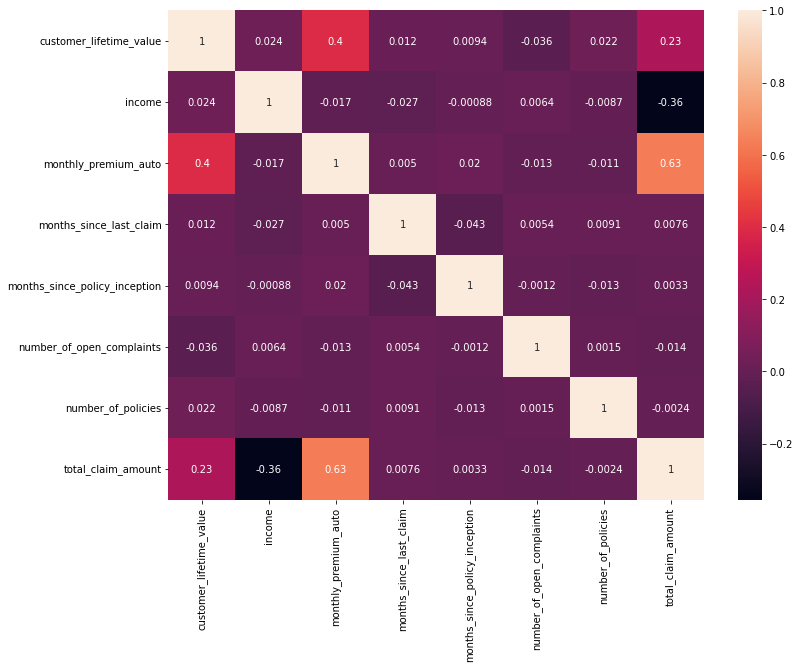

In [13]:
plt.figure(figsize = (12,9))
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [14]:
# We can see that there is a considerable correlation between monthly_premium_auto and total_claim_amount
# income and total_claim_amount are negatively corrrelated, customer_lifetime_value with total_claim_amount
# as well show a slight correlation. Also,monthly_premium_auto and customer_lifetime_value show a positive correlation of 0.4.
# However, the other features seems weak correlated with each other.
# if going to build a model, there is no need to drop feature because of high correlation here.
# but we can drop some featrures that has very weak correlation with our target variable to see if that will affect our model. 

# 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

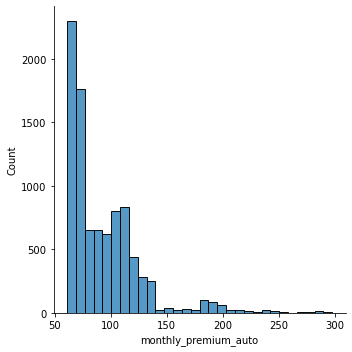

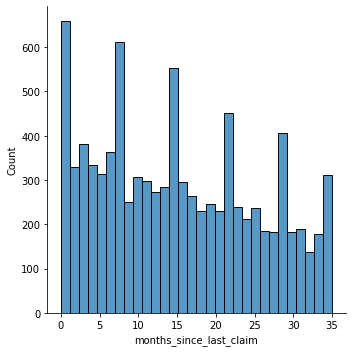

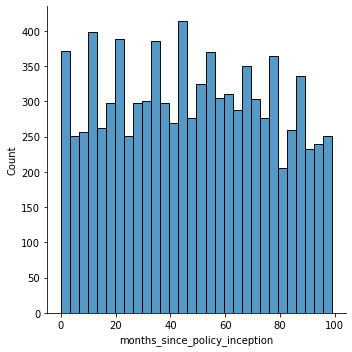

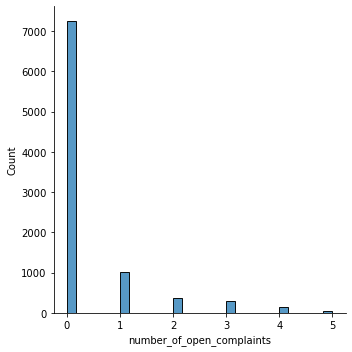

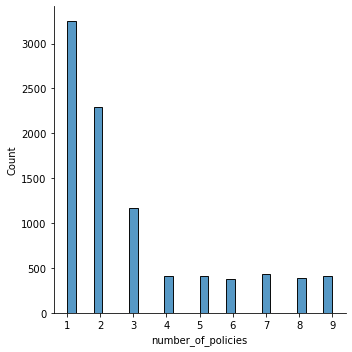

In [15]:
for i in discrete_df.columns:
    sns.displot(x = i, data = discrete_df, bins=30)
    plt.show()

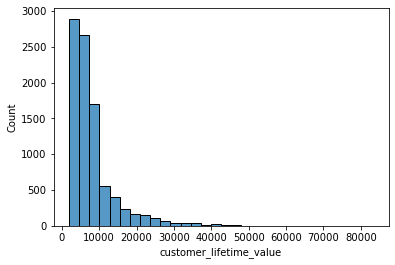

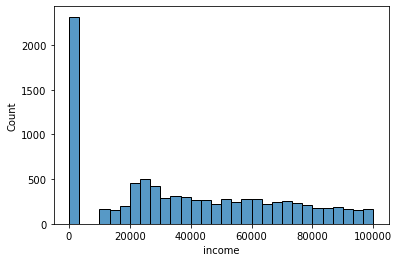

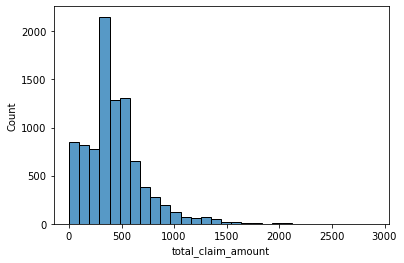

In [16]:
for i in continuous_df.columns:
    sns.histplot(x = i, data = continuous_df, bins=30)
    plt.show()

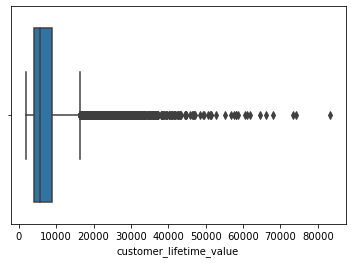

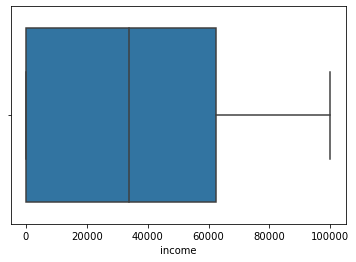

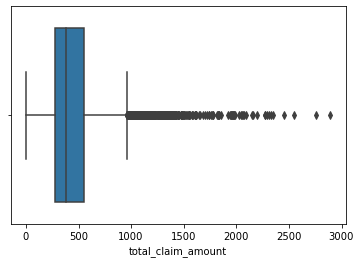

In [17]:
for i in continuous_df.columns:
    sns.boxplot(x = i, data = continuous_df)
    plt.show()

#9. Comment what you can see in the plots.

- It can be seen from the boxplots that total_claim_amount and customer_lifetime_value consist of some outliers.
- The column income contains a great number of 0 values, which should be treated.

#10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

- Using histograms was useful and give a good insight. However,the boxplot is better in showing the outliers in these variables 

#11. Did you find outliers? Comment what you will do with them.

- there are outliers and deciding what to do with them depends on what my model will look like and which variable I will use as target variable and what features I will include in X. 

#12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

- there are no NaN values in our dataframe.

In [18]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# Lab | Cleaning categorical data

# 2.Find all of the categorical data. Save it in a categorical_df variable.

In [19]:
categorical_df = customer_df.select_dtypes(include=[np.object])
categorical_df

/var/folders/nb/lfzlcsrj38n5g0jr2ql_tmgc0000gn/T/ipykernel_1848/1025927049.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include=[np.object])


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


# 3. Check for NaN values.

In [20]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

# 4. Check all unique values of columns.

In [21]:
for i in categorical_df.columns:
    print("column", i+":")
    display(categorical_df[i].value_counts(dropna = False))

column customer:


BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

column state:


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

column response:


No     7826
Yes    1308
Name: response, dtype: int64

column coverage:


Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

column education:


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

column employment_status:


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

column gender:


F    4658
M    4476
Name: gender, dtype: int64

column location_code:


Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

column marital_status:


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

column policy_type:


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

column policy:


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

column renew_offer_type:


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

column sales_channel:


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

column vehicle_class:


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

column vehicle_size:


Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

# 5.Check dtypes. Do they all make sense as categorical data?

In [22]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [23]:
# customer column doesn't make any sense as a categorical variable. (can be dropped)
# Also, response and gender could be change into binary variables that take 0 or 1 for Yes or No and Female or Male, respectively. 

# 6. Does any column contain alpha and numeric data? Decide how to clean it.

In [24]:
# The columns 'policy' and 'renew_offer_type' and 'customer' contain alpha and numeric data 
# I would go for dropping the column 'customer' as it contains many unique values, and that would be a problem in conducting the onehot encoder.
# similarly I will drop policy because this column is a duplication to what policy_type column shows. 
#I would rather keep ploicy_type column as it shows the aggregation form of the categories that appear in the column policy.

# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [25]:
# we can minimize the number of subcatogries in some columns and redefine some of these subcatogries.

# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [26]:
# as being mentioned before policy column contains a repetative information which have already been included in policy_type column
# I think dropping policy would be more ideal beacuse if we decide to keep policy, most likley the subcategories 
# in policy column will have some degree of multicollinearity.

In [27]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [28]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [29]:
categorical_df['employment_status'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

In [30]:
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [31]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [32]:
# those three column can be simplified by gropping some subcategories to be in one category.

In [33]:
categorical_df['employment_status'] = np.where(categorical_df.employment_status.isin(["Medical Leave","Disabled"]),'M-D_related_leave', categorical_df.employment_status)
categorical_df['employment_status'] = np.where(categorical_df.employment_status.isin(["Retired"]),'Unemployed', categorical_df.employment_status)
categorical_df['employment_status'].value_counts()

# M-D_related_leave--> Medical & Disable_ related_leave 

Employed             5698
Unemployed           2599
M-D_related_leave     837
Name: employment_status, dtype: int64

In [34]:
def clean_education(x):
    if x in ["Master", "Doctor"]:
        return 'higher educational degree'
    elif x in ["Bachelor", "College"]:
        return "baccalaureate degree"
    else:
        return x

categorical_df['education'] = categorical_df['education'].apply(clean_education)
categorical_df['education'].value_counts()

baccalaureate degree         5429
High School or Below         2622
higher educational degree    1083
Name: education, dtype: int64

In [35]:
categorical_df['vehicle_class'] = np.where(categorical_df.vehicle_class.isin(["Sports Car","Luxury SUV","Luxury Car"]),'Luxury Cars', categorical_df.vehicle_class)
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury Cars       831
Name: vehicle_class, dtype: int64

# Lab | Feature extraction

In [36]:
categorical_df

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,baccalaureate degree,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,baccalaureate degree,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,baccalaureate degree,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,baccalaureate degree,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,baccalaureate degree,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,baccalaureate degree,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,baccalaureate degree,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,baccalaureate degree,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,baccalaureate degree,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [37]:
categorical_df= categorical_df.drop(['customer'], axis=1)
categorical_df.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,baccalaureate degree,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,baccalaureate degree,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,baccalaureate degree,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,baccalaureate degree,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,baccalaureate degree,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [38]:
#Plot all the categorical variables with the proper plot. What can you see?

In [39]:
def plot_cat(cat_df):
    for i in cat_df.columns:
        sns.histplot(x=cat_df[i])
        plt.xticks(rotation=45)
        plt.show()
    return None

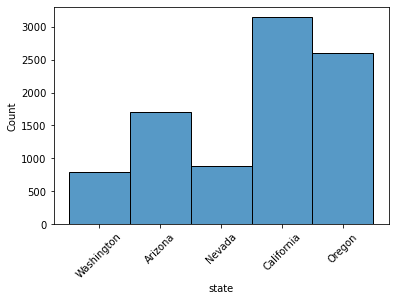

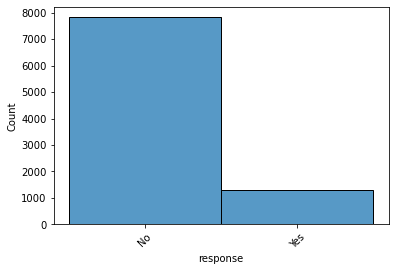

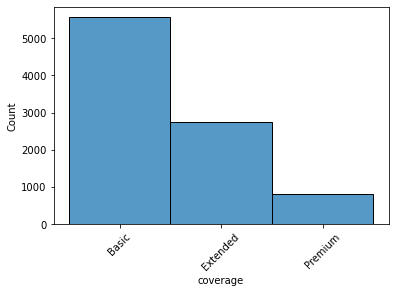

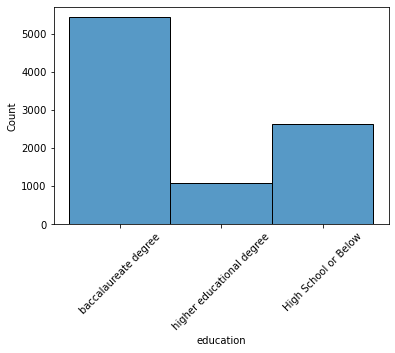

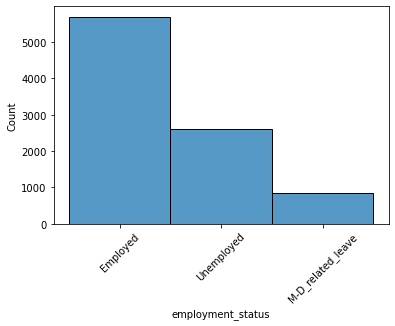

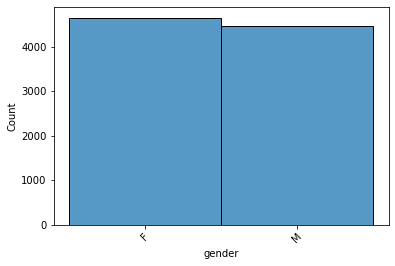

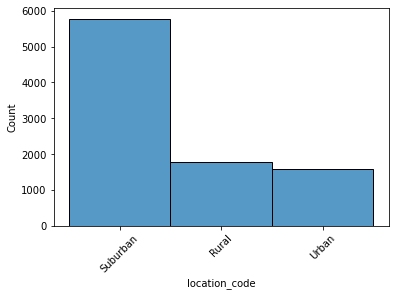

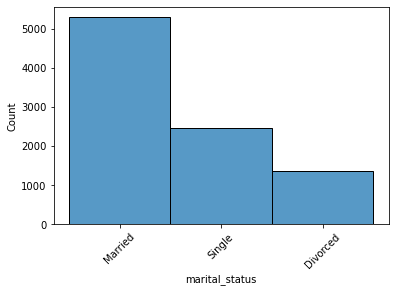

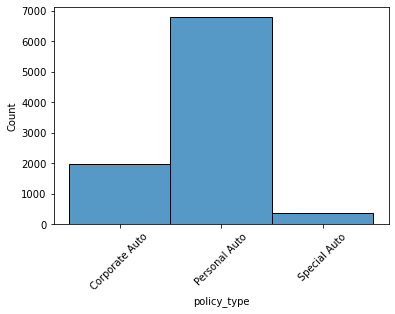

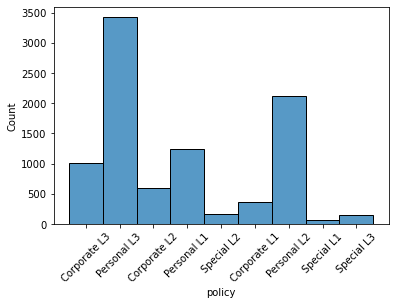

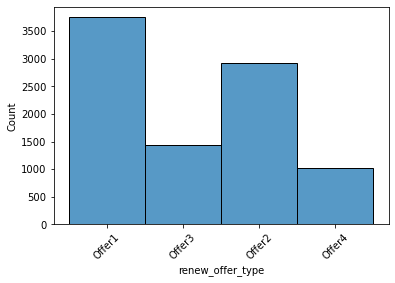

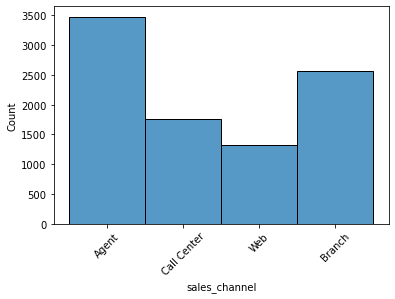

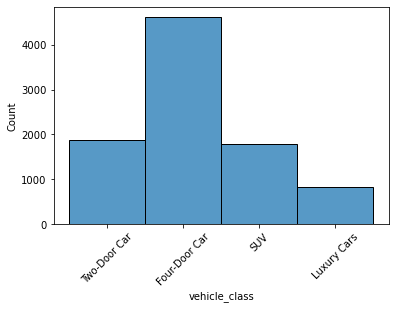

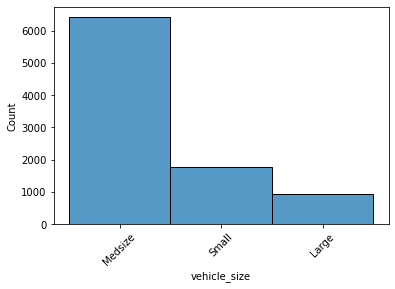

In [40]:
plot_cat(categorical_df)

In [41]:
#Plot time variable. Can you extract something from it?

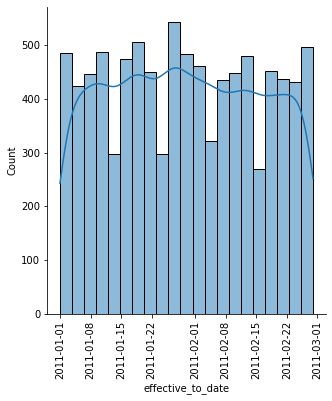

In [42]:
sns.displot(customer_df['effective_to_date'], kde=True)
plt.xticks(rotation=90)
plt.show()

In [43]:
# it a bit difficult to extract something from this plot. 

# Lab | Comparing regression models

# Removing outliers

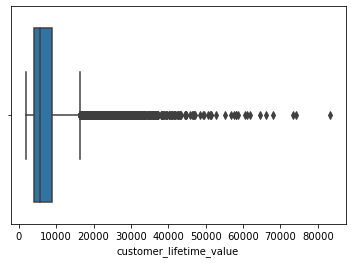

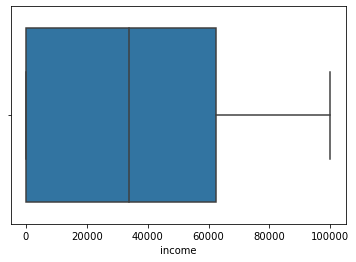

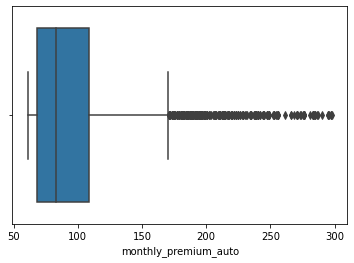

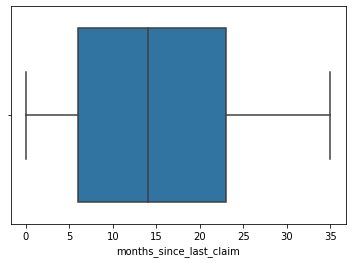

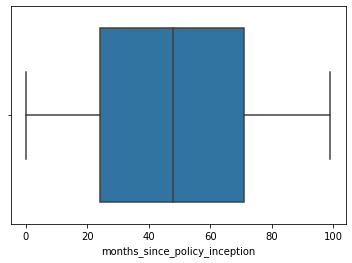

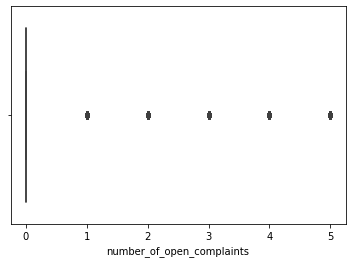

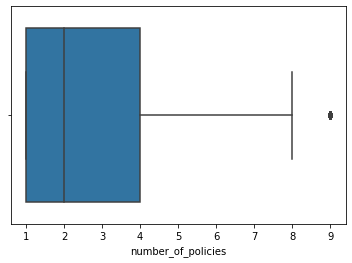

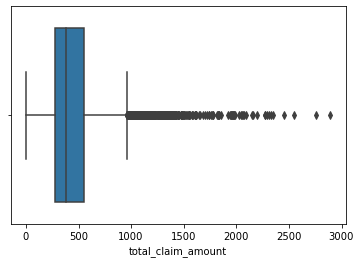

In [44]:
for i in numerical.columns:
    sns.boxplot(x = i, data = numerical)
    plt.show()

In [45]:
# basically I will remove the oultiers from the three columns 'total_claim_amount', 'customer_lifetime_value' 
# and 'monthly_premium_auto'

cust_df = customer_df.copy()

cust_df = cust_df[customer_df['total_claim_amount'] < 2200]
cust_df = cust_df[customer_df['customer_lifetime_value'] < 53000]
cust_df = cust_df[customer_df['monthly_premium_auto'] < 250]
cust_df.shape

/var/folders/nb/lfzlcsrj38n5g0jr2ql_tmgc0000gn/T/ipykernel_1848/4014290571.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cust_df = cust_df[customer_df['customer_lifetime_value'] < 53000]
/var/folders/nb/lfzlcsrj38n5g0jr2ql_tmgc0000gn/T/ipykernel_1848/4014290571.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cust_df = cust_df[customer_df['monthly_premium_auto'] < 250]


(9064, 24)

In [46]:
cust_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [47]:
numerical = cust_df.select_dtypes(np.number)

In [48]:
# redefine the continuous and discrete lists after removing the outliers 

continuous_lst= []
discrete_lst= []

for i in numerical.columns:
    
    if len(numerical[i].unique()) > 250:
        continuous_lst.append(i)
        
        
    else:
        discrete_lst.append(i)
    
display(continuous_lst)
display(discrete_lst)

['customer_lifetime_value', 'income', 'total_claim_amount']

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [49]:
continuous_df = cust_df[continuous_lst]
discrete_df = cust_df[discrete_lst]

In [50]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [51]:
discrete_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [52]:
cust_df = cust_df.drop(['customer'], axis=1)
cust_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [53]:
cust_df['employment_status'] = np.where(cust_df.employment_status.isin(["Medical Leave","Disabled"]),'M-D_related_leave', cust_df.employment_status)
cust_df['employment_status'] = np.where(cust_df.employment_status.isin(["Retired"]),'Unemployed', cust_df.employment_status)
cust_df['employment_status'].value_counts()

Employed             5658
Unemployed           2572
M-D_related_leave     834
Name: employment_status, dtype: int64

In [54]:
def clean_education(x):
    if x in ["Master", "Doctor"]:
        return 'higher educational degree'
    elif x in ["Bachelor", "College"]:
        return "baccalaureate degree"
    else:
        return x

cust_df['education'] = cust_df['education'].apply(clean_education)
cust_df['education'].value_counts()

baccalaureate degree         5387
High School or Below         2597
higher educational degree    1080
Name: education, dtype: int64

In [55]:
cust_df['vehicle_class'] = np.where(cust_df.vehicle_class.isin(["Sports Car","Luxury SUV","Luxury Car"]),'Luxury Cars', cust_df.vehicle_class)
cust_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1794
Luxury Cars       763
Name: vehicle_class, dtype: int64

#  Preparing data to build the model

In [56]:
# Import sklearn train_test_split and separate the data

y = cust_df['total_claim_amount']
X = cust_df.drop(['total_claim_amount'], axis =1)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [58]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(7251, 22)

(1813, 22)

(7251,)

(1813,)

In [59]:
# Create a copy of the dataframe for the data wrangling.

cust_df_copy = cust_df.copy()
cust_df_copy.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,baccalaureate degree,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,baccalaureate degree,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,baccalaureate degree,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,baccalaureate degree,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,baccalaureate degree,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [60]:
# Normalize the numerical variables.

numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
7450,17526.179080,52228,220,29,72,1,8
6187,3193.817363,93405,79,0,78,0,1
4351,11218.441730,69268,93,31,20,0,2
1673,5317.807221,74092,67,17,72,0,3
1321,3118.981095,23008,79,29,49,1,1


In [61]:
y_train.head()

7450    1056.000000
6187     202.514015
4351      19.170855
1673     321.600000
1321      80.663097
Name: total_claim_amount, dtype: float64

In [62]:
from sklearn.preprocessing import StandardScaler

# Scaling data

transformer = StandardScaler().fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [63]:
pd.DataFrame(numericals_train_standardized).head()

,0,1,2,3,4,5,6
0,1.509363,0.483138,4.134699,1.381935,0.846464,0.672835,2.091958
1,-0.727806,1.837173,-0.410528,-1.493902,1.061355,-0.424988,-0.824155
2,0.524775,1.043469,0.040771,1.580268,-1.015923,-0.424988,-0.407568
3,-0.396268,1.202098,-0.797355,0.191933,0.846464,-0.424988,0.009020
4,-0.739487,-0.477711,-0.410528,1.381935,0.022716,0.672835,-0.824155


In [64]:
# Encode the categorical variables 

categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)
categoricals_train.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
7450,California,No,Extended,baccalaureate degree,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer3,Agent,Luxury Cars,Medsize
6187,California,No,Extended,baccalaureate degree,Employed,F,Urban,Married,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Medsize
4351,Arizona,No,Extended,High School or Below,Employed,F,Rural,Married,Personal Auto,Personal L1,Offer2,Agent,Two-Door Car,Medsize
1673,Arizona,No,Basic,baccalaureate degree,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize
1321,California,No,Extended,baccalaureate degree,Employed,M,Rural,Married,Personal Auto,Personal L1,Offer2,Call Center,Four-Door Car,Medsize


In [65]:
# coverage ,employment_status, location code and vehicle size ---> Ordinal
# the other features --> onehot

onehot_train = categoricals_train.drop(['coverage', 'employment_status','location_code', 'vehicle_size'], axis = 1)
onehot_test = categoricals_test.drop(['coverage', 'employment_status','location_code', 'vehicle_size'], axis = 1)
onehot_train.head()

,state,response,education,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
7450,California,No,baccalaureate degree,F,Married,Personal Auto,Personal L3,Offer3,Agent,Luxury Cars
6187,California,No,baccalaureate degree,F,Married,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car
4351,Arizona,No,High School or Below,F,Married,Personal Auto,Personal L1,Offer2,Agent,Two-Door Car
1673,Arizona,No,baccalaureate degree,M,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car
1321,California,No,baccalaureate degree,M,Married,Personal Auto,Personal L1,Offer2,Call Center,Four-Door Car


In [66]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(onehot_train)
onehot_train_encoded = encoder.transform(onehot_train).toarray()
onehot_test_encoded = encoder.transform(onehot_test).toarray()

In [67]:
ordinal_train = categoricals_train.drop(['state','response','education', 'gender', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class'], axis = 1)
ordinal_test = categoricals_test.drop(['state','response','education', 'gender', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class'], axis = 1)
ordinal_train.head()

,coverage,employment_status,location_code,vehicle_size
7450,Extended,Employed,Suburban,Medsize
6187,Extended,Employed,Urban,Medsize
4351,Extended,Employed,Rural,Medsize
1673,Basic,Employed,Suburban,Medsize
1321,Extended,Employed,Rural,Medsize


In [68]:
for i in ordinal_train.columns:
    print("column", i+":")
    display(ordinal_train[i].value_counts(dropna = False))

column coverage:


Basic       4475
Extended    2176
Premium      600
Name: coverage, dtype: int64

column employment_status:


Employed             4511
Unemployed           2067
M-D_related_leave     673
Name: employment_status, dtype: int64

column location_code:


Suburban    4563
Rural       1419
Urban       1269
Name: location_code, dtype: int64

column vehicle_size:


Medsize    5069
Small      1408
Large       774
Name: vehicle_size, dtype: int64

In [69]:
def coverage(x):
    if 'Basic' in x:
        return '0'
    elif 'Extended' in x:
        return '1'
    else:
        return '2'
    
ordinal_train['coverage'] = ordinal_train['coverage'].apply(coverage)
ordinal_test['coverage'] = ordinal_test['coverage'].apply(coverage)

In [70]:
def employment_status(x):
    if 'Employed' in x:
        return '0'
    elif 'Unemployed' in x:
        return '1'
    else:
        return '2'
    
ordinal_train['employment_status'] = ordinal_train['employment_status'].apply(employment_status)
ordinal_test['employment_status'] = ordinal_test['employment_status'].apply(employment_status)

In [71]:
def location_code(x):
    if 'Suburban' in x:
        return '0'
    elif 'Rural' in x:
        return '1'
    else:
        return '2'
    
ordinal_train['location_code'] = ordinal_train['location_code'].apply(location_code)
ordinal_test['location_code'] = ordinal_test['location_code'].apply(location_code)

In [72]:
def vehicle_size(x):
    if 'Medsize' in x:
        return '0'
    elif 'Small' in x:
        return '1'
    else:
        return '2'
    
ordinal_train['vehicle_size'] = ordinal_train['vehicle_size'].apply(vehicle_size)
ordinal_test['vehicle_size'] = ordinal_test['vehicle_size'].apply(vehicle_size)

In [73]:
ordinal_train.head()

,coverage,employment_status,location_code,vehicle_size
7450,1,0,0,0
6187,1,0,2,0
4351,1,0,1,0
1673,0,0,0,0
1321,1,0,1,0


In [74]:
X_train = np.concatenate((numericals_train_standardized, onehot_train_encoded, ordinal_train), axis = 1)
X_test = np.concatenate((numericals_test_standardized, onehot_test_encoded, ordinal_test), axis = 1)

In [75]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.509363,0.483138,4.134699,1.381935,0.846464,0.672835,2.091958,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0
1,-0.727806,1.837173,-0.410528,-1.493902,1.061355,-0.424988,-0.824155,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2,0
2,0.524775,1.043469,0.040771,1.580268,-1.015923,-0.424988,-0.407568,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0
3,-0.396268,1.202098,-0.797355,0.191933,0.846464,-0.424988,0.00902,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,-0.739487,-0.477711,-0.410528,1.381935,0.022716,0.672835,-0.824155,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7246,-0.426649,1.721227,-0.926298,0.191933,-1.015923,-0.424988,0.00902,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0
7247,0.026339,-1.23429,-0.474999,0.489433,-0.801032,-0.424988,-0.407568,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1,2
7248,0.423681,1.792419,1.297962,-0.799735,1.02554,-0.424988,0.00902,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1,0,2,0
7249,-0.547475,1.75457,0.588777,1.778602,-1.732226,-0.424988,-0.824155,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0


# A simple linear regression model

In [76]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [77]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [78]:
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.5980380098514595

In [79]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5958671143418448

In [80]:
y_test[:5]

5044    609.600000
656     333.886816
4021    612.000000
707     244.231350
5153     36.975673
Name: total_claim_amount, dtype: float64

In [81]:
predictions_test[:5]

array([544.10849212, 339.00295295, 587.06853241, 196.64692036,
       375.95662889])

In [82]:
# The score on the train set is slightly better than the test set 

# Using KNeighborsRegressor model

In [83]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [84]:
score = KNN.score(X_test, y_test)
score

0.6428978306093386

In [85]:
score_train = KNN.score(X_train, y_train)
score_train

0.7571934762369474

In [86]:
# The score in KNeighborsRegressor model is better. 
# the test set score is lower than the train set which is normal and expected. 

# Lab | Random variable distributions

In [93]:
#Get the numerical variables from our dataset

# we have already define our numerical variables in the priveous lab 'above' 
display(numerical)
display(numerical.shape)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


(9064, 8)

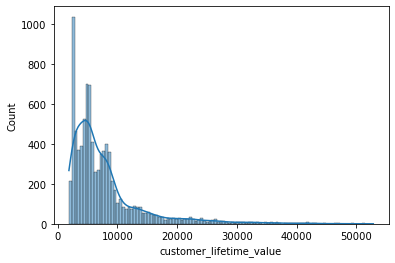

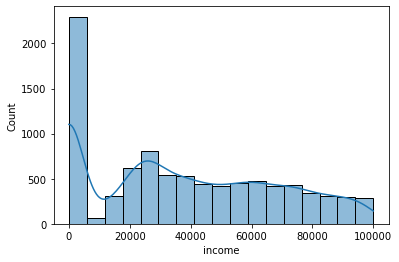

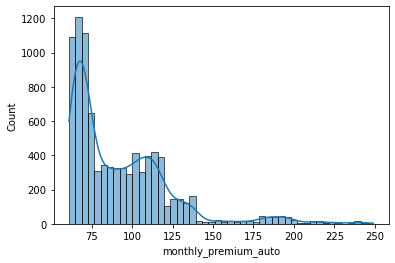

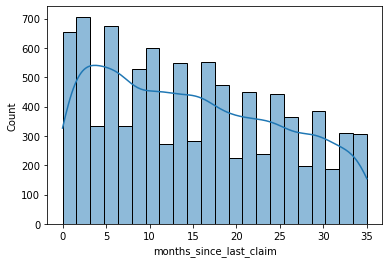

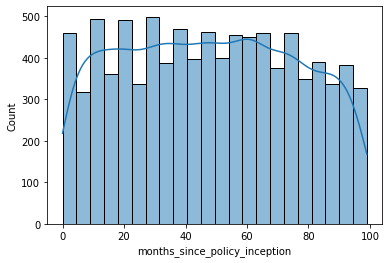

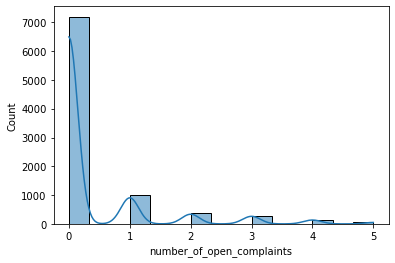

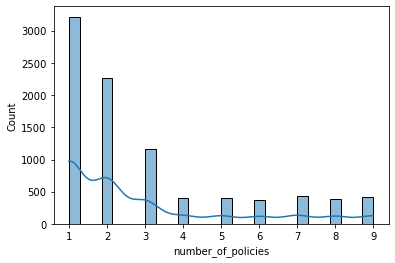

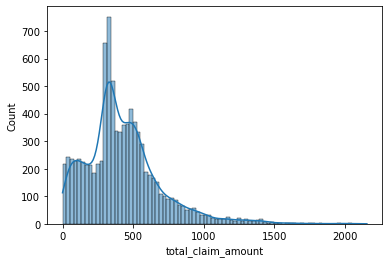

In [97]:
#Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

for i in numerical.columns:
    sns.histplot(x = i, data = numerical, kde=True)
    plt.show()

In [ ]:
# most of the variables fit an exponential distribution, as it appears in customer_lifetime_value
# and income,for example, many observations relatively close to 0 and a few obervations that deviate far to the right from 0

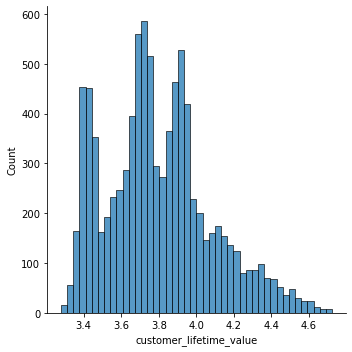

In [98]:
#Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result

def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

cust_l_value_log = numerical['customer_lifetime_value'].apply(log_transfom_clean1)
sns.displot(cust_l_value_log)
plt.show()

/var/folders/nb/lfzlcsrj38n5g0jr2ql_tmgc0000gn/T/ipykernel_1848/4260768004.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(x)


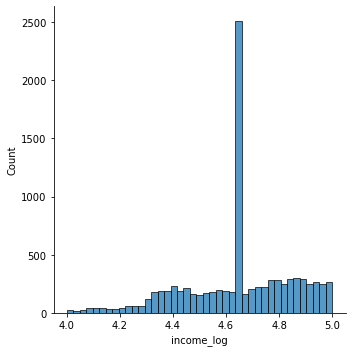

In [99]:
def log_transform_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 
numerical['income_log'] = list(map(log_transform_clean2, numerical['income']))

# Now we replace the NAN by the mean
numerical['income_log'] = numerical['income_log'].fillna(np.mean(numerical['income_log']))
sns.displot(numerical['income_log'])
plt.show()

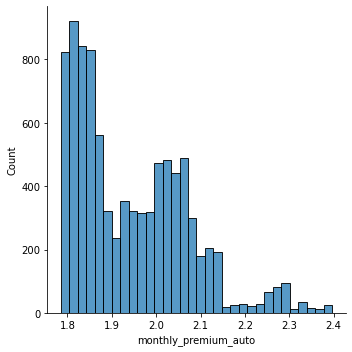

In [101]:
def log_transfom_clean3(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

monthly_pre_auto_log = numerical['monthly_premium_auto'].apply(log_transfom_clean3)
sns.displot(monthly_pre_auto_log)
plt.show()

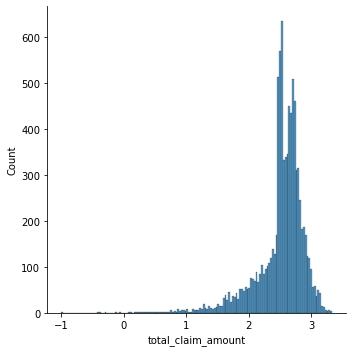

In [102]:
def log_transfom_clean4(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

total_claim_amount_log = numerical['total_claim_amount'].apply(log_transfom_clean4)
sns.displot(total_claim_amount_log)
plt.show()